###### 1_kmeans_clustering.ipynb

## K-평균 (K-Means)
- 중심점 기반 대표적인 알고리즘
- 군집 개수 K를 지정하여 거리 기반으로 군집을 형성하는 방식

labels : [1 1 1 1 0 0 0 0]
cluster centers : [[8.5 8.5]
 [1.5 2.5]]


Text(0.5, 1.0, 'K-Means Clustering (Simple Data)')

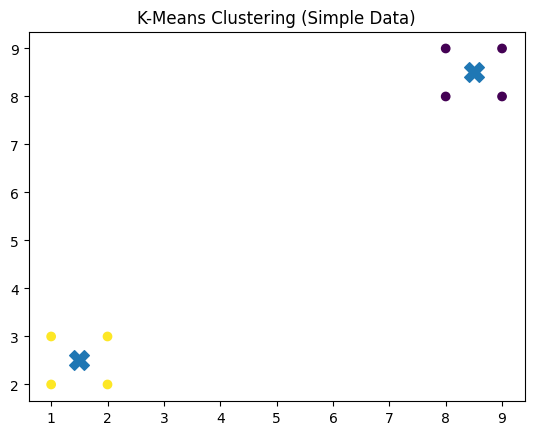

In [1]:
import numpy as np

# 샘플 데이터
x = np.array([
  [1,2], [1,3], [2,2], [2,3],         # 첫번째 묶음 (Cluster1)
  [8,8], [8,9], [9,8], [9,9]          # 두번째 묶음 (Cluster2)
])

# 모델 학습
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
# * n_clusters : 군집 수(K)
kmeans.fit(x)

# 결과 추출
# => 군집 종류(레이블), 군집 중심점 좌표
labels = kmeans.labels_             # 군집 종류
centers = kmeans.cluster_centers_   # 군집 중심점 좌표

print(f'labels : {labels}')
print(f'cluster centers : {centers}')

# 결과 시각화
import matplotlib.pyplot as plt

# 산점도
# * 샘플 데이터 표시
plt.scatter(x[:, 0],      # x 축
            x[:, 1],      # y 축
            c=labels)     # 같은 군집 종류끼리 색상 표시

# * 중심점 데이터 표시
plt.scatter(centers[:, 0],
            centers[:, 1],
            marker='X',
            s=200)

plt.title("K-Means Clustering (Simple Data)")

* --- 가상의 군집 데이터 결과 추출 --- *
labels : [1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
centers : [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]


Text(0.5, 1.0, 'K-Means with make_blobs')

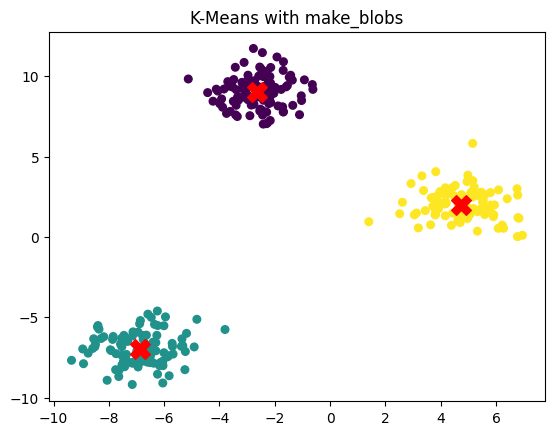

In [2]:
# 가상의 군집 데이터 생성
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=300, centers=3, random_state=42)
# * n_samples : 점 개수
# * centers : 군집 수

x
# KMeans 모델 학습 - 군집수: 3
model = KMeans(n_clusters=3, random_state=42)

# 학습
model.fit(x)

# 결과 추출
labels = model.labels_
centers = model.cluster_centers_

print('* --- 가상의 군집 데이터 결과 추출 --- *')
print(f'labels : {labels}')
print(f'centers : {centers}')

# 시각화
plt.scatter(x[:, 0], x[:, 1], c=labels, s=30)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='red')

plt.title("K-Means with make_blobs")

* --- Iris datasets --- *
labels : [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
centers : [[6.81276596 3.07446809]
 [5.77358491 2.69245283]
 [5.006      3.428     ]]


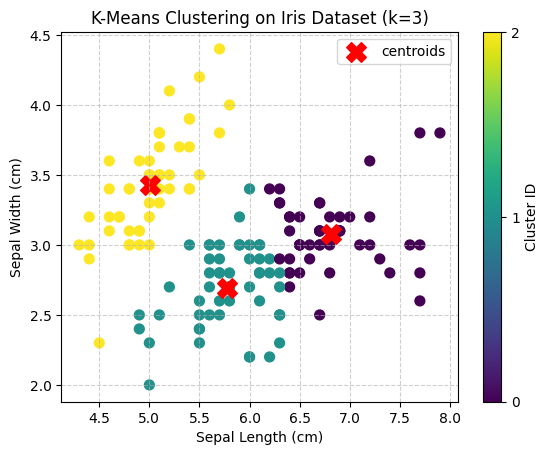

In [5]:
# 붓꽃 데이터셋 (Iris)

# 데이터 로드(가져오기)
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
# iris.keys()
df = iris.frame

df.columns
# 2개의 특징만 사용하여 학습 => 'sepal length (cm)', 'sepal width (cm)'
x = df[['sepal length (cm)', 'sepal width (cm)']]
x

# 모델 학습 => 군집 수 3
model = KMeans(n_clusters=3, random_state=42, n_init=10)
# * n_init : 초기 중심점 선택 반복 횟수
model.fit(x)

# 결과 추출
labels = model.labels_
centers = model.cluster_centers_

print('* --- Iris datasets --- *')
print(f'labels : {labels}')
print(f'centers : {centers}')

# 시각화 -> 산점도

# plt.scatter(x['sepal length (cm)'], x['sepal width (cm)'], c=labels, s=50) # 라벨 기반 인덱싱
sct1 = plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=labels, s=50)               # 위치 기반 인덱싱
plt.colorbar(sct1, ticks=[0,1,2], label='Cluster ID')

plt.scatter(centers[:, 0], centers[:, 1], color='red', marker='X', s=200, label='centroids')

plt.title('K-Means Clustering on Iris Dataset (k=3)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
# ------------------------------ * --------------------------------------- #